<h1><b>Helper Functions<b><h1>

In [ ]:
import config
import constants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

SEED = constants.SEED
np.random.seed(SEED)

def get_even_distribution(X, y, num_samples_per_label=2250):
    #Keep 2250 samples for each class
    random_seed = SEED

    #samples to pick per label
    samples_per_label = num_samples_per_label

    #randomize samples picked per label without replacement
    np.random.seed(random_seed)
    list_of_labels = [-1, 0, 1]
    indicies = {label: np.where(y == label)[0] for label in list_of_labels}
    samples = {label: np.random.choice(indicies[label], samples_per_label, replace=False) for label in list_of_labels}

    all_samples = np.concatenate([samples[label] for label in list_of_labels])
    #want to mix up labels now since samples are seperated by label
    np.random.shuffle(all_samples)

    y = y[all_samples]
    X = X[all_samples]
    return X, y

def plot_train_test_accuracy(title, x_axis_label, parameter, train_accuracy, test_accuracy):
    plt.plot(parameter, train_accuracy)
    plt.plot(parameter, test_accuracy)
    plt.grid()
    plt.legend(["Training", "Test"])
    plt.xlabel(x_axis_label)
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.show()

# Confusion Matrix for Visualization
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

<h1><b>Load Data (Youtube Dataset)<b><h1>

In [ ]:
# Load Preprocessed Data
df = pd.read_csv(constants.PATH_DATA_PROCESSED + "youtube_sentiment.csv.gz", compression='gzip')
print("Dataset Shape:", df.shape)
print("Dataset Sample:")
print(df.head())
# Keep only positive (1) and negative (-1) sentiments (binary classification)
#df = df[df['label'] != 0]

# Splitting into training and testing sets
comments = df['comment']
labels = df['label']

Dataset Shape: (18408, 2)
Dataset Sample:
                                             comment  label
0  lets not forget that apple pay in 2014 require...      0
1  here in nz 50 of retailers don’t even have con...     -1
2  i will forever acknowledge this channel with t...      1
3  whenever i go to a place that doesn’t take app...     -1
4  apple pay is so convenient secure and easy to ...      1


<h1><b>Bag of Words Experiments<b><h1>

In [33]:
# Experiment 1: Bag of Words (BoW)
vectorizer = CountVectorizer(
    max_features=1000,
    stop_words='english',
    vocabulary=None,
    lowercase=True,
    strip_accents='unicode'
)

# Transform text data into BoW representation
bow = vectorizer.fit_transform(comments)

In [34]:
print(vectorizer.get_feature_names_out())

['10' '100' '1010' '12' '13' '14' '15' '16' '20' '2022' '2222' '2323' '25'
 '30' '3x3' '50' 'abian' 'ability' 'able' 'absolute' 'absolutely' 'access'
 'action' 'actual' 'actually' 'add' 'added' 'advice' 'age' 'ago' 'agree'
 'ahead' 'ai' 'air' 'algorithm' 'amazing' 'american' 'analysis' 'analyst'
 'anh' 'animals' 'answer' 'answers' 'anymore' 'apple' 'apply' 'appreciate'
 'approach' 'apreciado' 'area' 'arent' 'art' 'artisticas' 'ask' 'asked'
 'asking' 'asmr' 'attention' 'audience' 'available' 'average' 'away'
 'awesome' 'background' 'bad' 'base' 'based' 'basic' 'basically' 'battery'
 'battle' 'beast' 'beat' 'beautiful' 'bed' 'beginning' 'believe'
 'bellamente' 'best' 'better' 'big' 'bigger' 'biggest' 'biology' 'bit'
 'bitcoin' 'black' 'bless' 'blue' 'body' 'book' 'books' 'born' 'bought'
 'box' 'brain' 'break' 'brillantes' 'brilliant' 'bring' 'bro' 'brother'
 'brought' 'btc' 'build' 'building' 'business' 'buy' 'buying' 'called'
 'came' 'camera' 'car' 'care' 'career' 'case' 'cause' 'certai

In [35]:
print(bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
X, y = get_even_distribution(bow, labels, num_samples_per_label=2250)

In [37]:
print(len(y))
print(X.shape)

6750
(6750, 1000)


In [40]:
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

<h1><b>Tune SVM With Grid Search<b><h1>

In [41]:
# Define SVM Model
#svm_model = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')  # ovr is one to rest classification

# Train and Evaluate BoW-based SVM
#svm_model.fit(X_bow_train, y_train)
#y_bow_pred = svm_model.predict(X_bow_test)


# Print Evaluation Results
#print("SVM with BoW Results:")
#print("Accuracy:", accuracy_score(y_test, y_bow_pred))
#print(classification_report(y_test, y_bow_pred))



param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale', 'auto']  # Only relevant for non-linear kernels
}

grid_search = GridSearchCV(SVC(decision_function_shape='ovr', verbose=True), param_grid, cv=5, scoring='accuracy', n_jobs=4)
grid_search.fit(X_train, y_train)

# Step 7: Train Final Optimized Model
best_params = grid_search.best_params_
print(f"Best Parameters Found: {best_params}")

optimized_svm = SVC(**best_params, decision_function_shape='ovr')
optimized_svm.fit(X_train, y_train)

[LibSVM]Best Parameters Found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=10)

<h1><b>Results (Grid Search)<b><h1>


 Optimized SVM with BoW Results:
Accuracy: 0.6503703703703704
              precision    recall  f1-score   support

          -1       0.60      0.63      0.62       444
           0       0.58      0.63      0.60       449
           1       0.78      0.69      0.74       457

    accuracy                           0.65      1350
   macro avg       0.66      0.65      0.65      1350
weighted avg       0.66      0.65      0.65      1350



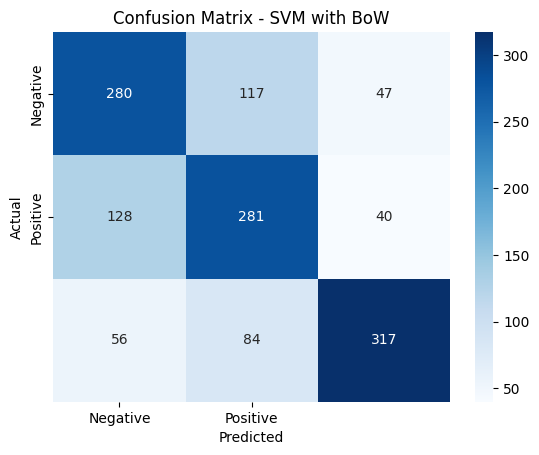

In [42]:
# Step 8: Evaluate Optimized SVM Model
y_tuned = optimized_svm.predict(X_test)

print("\n Optimized SVM with BoW Results:")
print("Accuracy:", accuracy_score(y_test, y_tuned))
print(classification_report(y_test, y_tuned))

# Plot confusion matrices
plot_confusion_matrix(y_test, y_tuned, "Confusion Matrix - SVM with BoW")

<h1><b>Train With 1/4 as Many Samples (Even Ratio of Classified Samples)<b><h1>

In [43]:
# Experiment 1: Bag of Words (BoW)
bow_vectorizer = CountVectorizer(
    max_features=1000,
    stop_words='english',
    vocabulary=None,
    lowercase=True,
    strip_accents='unicode'
)

# Transform text data into BoW representation
bow = bow_vectorizer.fit_transform(comments)

X, y = get_even_distribution(bow, labels, num_samples_per_label=575)

In [44]:
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

<h1><b>Tune With Grid Search<b><h1>

In [45]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale', 'auto']  # Only relevant for non-linear kernels
}

grid_search_less = GridSearchCV(SVC(decision_function_shape='ovr', verbose=True), param_grid, cv=5, scoring='accuracy', n_jobs=4)
grid_search_less.fit(X_train, y_train)

# Step 7: Train Final Optimized Model
best_params = grid_search.best_params_
print(f"Best Parameters Found: {best_params}")

optimized_svm_less = SVC(**best_params, decision_function_shape='ovr')
optimized_svm_less.fit(X_train, y_train)

[LibSVM]Best Parameters Found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=10)

<b><h1>Results (Grid Search)<b><h1>


 Optimized SVM with BoW Results:
Accuracy: 0.5971014492753624
              precision    recall  f1-score   support

          -1       0.50      0.54      0.52       108
           0       0.56      0.58      0.57       113
           1       0.75      0.67      0.71       124

    accuracy                           0.60       345
   macro avg       0.60      0.59      0.60       345
weighted avg       0.61      0.60      0.60       345



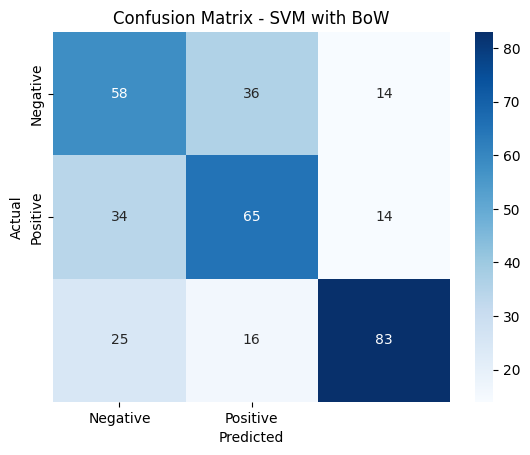

In [46]:
# Step 8: Evaluate Optimized SVM Model
y_tuned = optimized_svm_less.predict(X_test)

print("\n Optimized SVM with BoW Results:")
print("Accuracy:", accuracy_score(y_test, y_tuned))
print(classification_report(y_test, y_tuned))

# Confusion Matrix for Visualization
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, y_tuned, "Confusion Matrix - SVM with BoW")

<h1><b>Testing Number of Features<b><h1>

Testing:   0%|          | 0/199 [00:00<?, ?it/s]

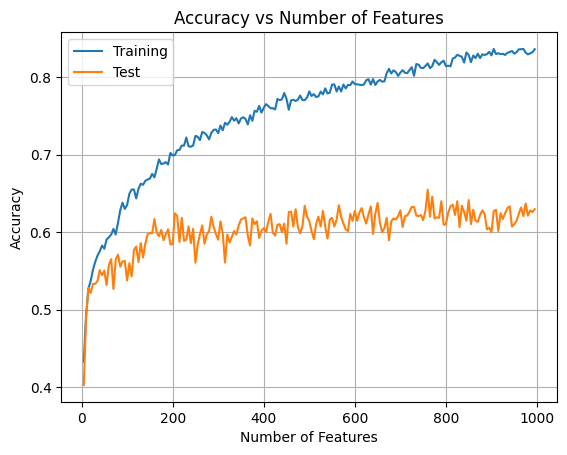

In [48]:
features = []
train_accuracy = []
test_accuracy = []

start=5
stop=1000
step=5
total=int((stop-start)/step)

#samples to pick per label
samples_per_label = 2250

list_of_labels = [-1, 0, 1]
with tqdm(total=total, desc="Testing: ") as progress_bar:
    for i in range(start, stop, step):
        X_text = df['comment']
        y = df['label']

        bow_vectorizer = CountVectorizer(
            max_features=i,
            stop_words='english',
            vocabulary=None,
            lowercase=True,
            strip_accents='unicode'
        )

        # Transform text data into BoW representation
        X_bow = bow_vectorizer.fit_transform(X_text)

        #Still keep even number of classified samples
        #randomize samples picked per label without replacement
        indicies = {label: np.where(y == label)[0] for label in list_of_labels}
        samples = {label: np.random.choice(indicies[label], samples_per_label, replace=False) for label in list_of_labels}

        all_samples = np.concatenate([samples[label] for label in list_of_labels])
        #want to mix up labels now since samples are seperated by label
        np.random.shuffle(all_samples)

        y = y[all_samples]
        X_bow = X_bow[all_samples]

        # Train-Test Split (80-20)
        X_bow_train, X_bow_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

        #Let the training begin!
        features.append(i)
        #Try with best params found using grid search
        svm = SVC(decision_function_shape='ovr', C=1, gamma=0.1, kernel="rbf")
        svm.fit(X_bow_train, y_train)
        train_accuracy.append(svm.score(X_bow_train, y_train))
        test_accuracy.append(svm.score(X_bow_test, y_test))

        progress_bar.update()

plot_train_test_accuracy(title="Accuracy vs Number of Features" ,x_axis_label="Number of Features", parameter=features, train_accuracy=train_accuracy, test_accuracy=test_accuracy)
    

<h2><b>Load Data (Twitter Dataset)<b><h2>

In [4]:
# Load Preprocessed Data
df = pd.read_csv(constants.PATH_DATA_PROCESSED + "Twitter_Data.csv.gz", compression='gzip')
print("Dataset Shape:", df.shape)
print("Dataset Sample:")
print(df.head())
# Keep only positive (1) and negative (-1) sentiments (binary classification)
#df = df[df['label'] != 0]

# Splitting into training and testing sets
comments = df['comment']
labels = df['label']

Dataset Shape: (162976, 2)
Dataset Sample:
                                             comment  label
0  when modi promised “minimum government maximum...   -1.0
1  talk all the nonsense and continue all the dra...    0.0
2  what did just say vote for modi  welcome bjp t...    1.0
3  asking his supporters prefix chowkidar their n...    1.0
4  answer who among these the most powerful world...    1.0


In [63]:
print(comments.head())
print(labels.head())

0    when modi promised “minimum government maximum...
1    talk all the nonsense and continue all the dra...
2    what did just say vote for modi  welcome bjp t...
3    asking his supporters prefix chowkidar their n...
4    answer who among these the most powerful world...
Name: comment, dtype: object
0   -1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: label, dtype: float64


In [5]:
# Experiment 1: Bag of Words (BoW)
vectorizer = CountVectorizer(
    max_features=1000,
    stop_words='english',
    vocabulary=None,
    lowercase=True,
    strip_accents='unicode'
)

# Transform text data into BoW representation
bow = vectorizer.fit_transform(comments.astype('U').values)

In [6]:
X, y = get_even_distribution(bow, labels, num_samples_per_label=2250)

In [73]:
print(X.shape)
print(y.shape)

(6750, 1000)
(6750,)


<h2><b>Tune With GridSearch<b><h2>

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [75]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale', 'auto']  # Only relevant for non-linear kernels
}

grid_search = GridSearchCV(SVC(decision_function_shape='ovr', verbose=True), param_grid, cv=5, scoring='accuracy', n_jobs=4)
grid_search.fit(X_train, y_train)

# Step 7: Train Final Optimized Model
best_params = grid_search.best_params_
print(f"Best Parameters Found: {best_params}")

optimized_svm = SVC(**best_params, decision_function_shape='ovr')
optimized_svm.fit(X_train, y_train)

[LibSVM]Best Parameters Found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


SVC(C=10, gamma=0.01)

<h2><b>Results<b><h2>


 Optimized SVM with BoW Results:
Accuracy: 0.39037037037037037
              precision    recall  f1-score   support

        -1.0       0.38      0.32      0.34       443
         0.0       0.39      0.61      0.48       432
         1.0       0.40      0.26      0.32       475

    accuracy                           0.39      1350
   macro avg       0.39      0.40      0.38      1350
weighted avg       0.39      0.39      0.38      1350



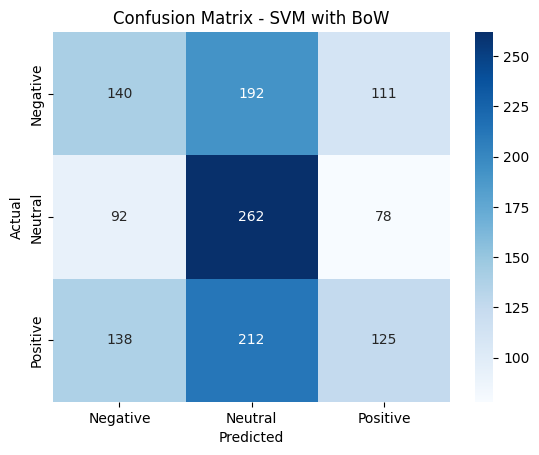

In [77]:
y_tuned = optimized_svm_less.predict(X_test)

print("\n Optimized SVM with BoW Results:")
print("Accuracy:", accuracy_score(y_test, y_tuned))
print(classification_report(y_test, y_tuned))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_tuned, "Confusion Matrix - SVM with BoW")

<h2><b>Lots More Samples<b><h2>

In [9]:
# Experiment 1: Bag of Words (BoW)
vectorizer = CountVectorizer(
    stop_words='english',
    vocabulary=None,
    lowercase=True,
    strip_accents='unicode'
)

# Transform text data into BoW representation
bow = vectorizer.fit_transform(comments.astype('U').values)

In [10]:
X, y = get_even_distribution(bow, labels, num_samples_per_label=30000)
print(X.shape)
print(y.shape)

(90000, 120621)
(90000,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [12]:
svm = SVC(decision_function_shape='ovr', C=10, gamma=0.01, kernel="rbf")
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.01)


 Optimized SVM with BoW Results:
Accuracy: 0.8342222222222222
              precision    recall  f1-score   support

        -1.0       0.85      0.80      0.82      3036
         0.0       0.80      0.95      0.87      3007
         1.0       0.87      0.75      0.81      2957

    accuracy                           0.83      9000
   macro avg       0.84      0.83      0.83      9000
weighted avg       0.84      0.83      0.83      9000



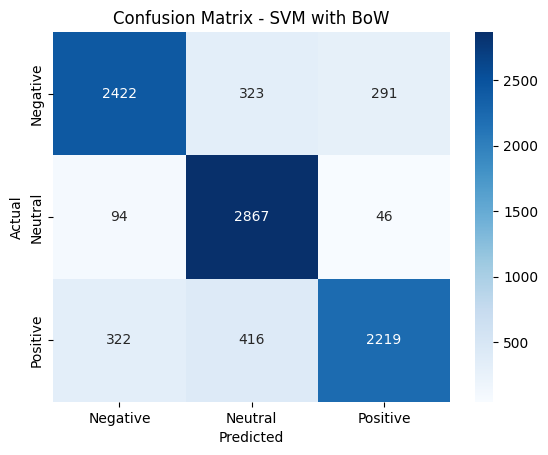

In [ ]:
y_tuned = svm.predict(X_test)

print("\n Optimized SVM with BoW Results:")
print("Accuracy:", accuracy_score(y_test, y_tuned))
print(classification_report(y_test, y_tuned))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_tuned, "Confusion Matrix - SVM with BoW")

In [18]:
# Load Preprocessed Data
df = pd.read_csv(constants.PATH_DATA_PROCESSED + "combined.csv.gz", compression='gzip')
print("Dataset Shape:", df.shape)
print("Dataset Sample:")
print(df.head())
# Keep only positive (1) and negative (-1) sentiments (binary classification)
#df = df[df['label'] != 0]

# Splitting into training and testing sets
comments = df['comment']
labels = df['label']

Dataset Shape: (218533, 2)
Dataset Sample:
                                             comment  label
0  physics saying he s richhim wearing deafultyea...    0.0
1  kirk was the real deal  born in 1916 died in 2...    1.0
2  thank you so much i’m currently studying for t...    1.0
3  fuck not the best match for india but had grea...    1.0
4  india attains the capability target destroy sp...   -1.0


<h2><b>Combined Dataset<b><h2>

In [19]:
# Experiment 1: Bag of Words (BoW)
vectorizer = CountVectorizer(
    stop_words='english',
    vocabulary=None,
    lowercase=True,
    strip_accents='unicode'
)

# Transform text data into BoW representation
bow = vectorizer.fit_transform(comments.astype('U').values)

In [29]:
X, y = get_even_distribution(bow, labels, num_samples_per_label=45000)
print(X.shape)
print(y.shape)

(135000, 170306)
(135000,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [31]:
svm = SVC(decision_function_shape='ovr', C=10, gamma=0.01, kernel="rbf")
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.01)


 Optimized SVM with BoW Results:
Accuracy: 0.8493333333333334
              precision    recall  f1-score   support

        -1.0       0.87      0.82      0.84      9000
         0.0       0.82      0.95      0.88      9028
         1.0       0.88      0.78      0.82      8972

    accuracy                           0.85     27000
   macro avg       0.85      0.85      0.85     27000
weighted avg       0.85      0.85      0.85     27000



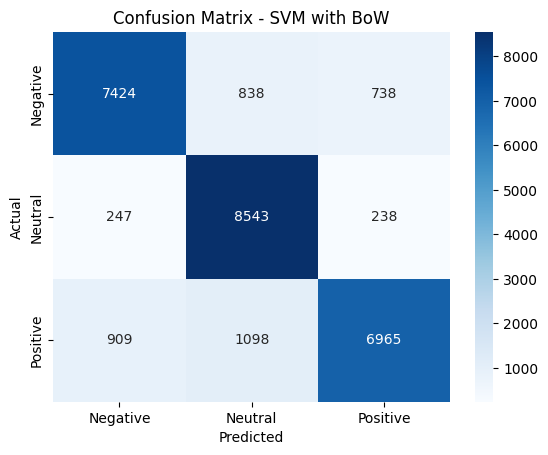

In [32]:
y_tuned = svm.predict(X_test)

print("\n Optimized SVM with BoW Results:")
print("Accuracy:", accuracy_score(y_test, y_tuned))
print(classification_report(y_test, y_tuned))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_tuned, "Confusion Matrix - SVM with BoW")